In [1]:
!pip install langdetect
!pip install contractions
!pip install BeautifulSoup4
!pip install seaborn
!pip install wordcloud
!pip install nltk
!pip install spacy

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pickle 
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys

import contractions

from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

import langdetect 

import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk import RegexpParser

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
nltk.download('tagsets')
nltk.download("stopwords")
nltk.download('wordnet')

from nltk.corpus import stopwords

import spacy
from spacy.tokens import Span

nlp = spacy.blank('en')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
my_local_drive='/content/gdrive/MyDrive/UM partage/Master/S8/Projet ML1/Laboratoire de Lucas'

sys.path.append(my_local_drive)

%cd $my_local_drive

%pwd

/content/gdrive/MyDrive/UM partage/Master/S8/Projet ML1/Laboratoire de Lucas


'/content/gdrive/MyDrive/UM partage/Master/S8/Projet ML1/Laboratoire de Lucas'

In [5]:
from MyNLPUtilities import *

# Importer les données

Le fichier news.csv contient les données

In [6]:
news = pd.read_csv("news8904.csv", sep=",")

# Découpage du jeu de données

In [7]:
X = news.drop(['ratingName'], axis=1)
Y = pd.DataFrame(news['ratingName'])

#news.iloc[:1]
X[:3]
#news.columns
#news.head()


,Unnamed: 0,id,text,date,truthRating,author,headline,named_entities_claim,named_entities_article,keywords,source,sourceURL,link,language
0,8899,http://data.gesis.org/claimskg/claim_review/e2...,'Liberals' want to change the name of Cracker ...,Unknown,1,Unknown,Liberals Want to Change the Name of ‘Cracker B...,"Change.org,Charleston, South Carolina,Cracker ...",NaN,"caucasian barrel, change.org, cracker barrel, ...",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/caucasian-ba...,English
1,2194,http://data.gesis.org/claimskg/claim_review/ee...,U.S. President Donald Trump laughed during a r...,Unknown,3,Unknown,Did Trump Laugh When Audience Member at Rally ...,"Donald Trump,El Paso, Texas,Hispanic,Latino,Pa...",Donald Trump,NaN,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/trump-laugh-...,English
2,5468,http://data.gesis.org/claimskg/claim_review/c8...,'Californians are overwhelmingly against this ...,2018-02-01,1,Travis Allen,"Travis Allen gets it wrong, again, on support ...","Capital Public Radio,Fox News,Los Angeles Time...",NaN,"Crime,Criminal Justice,Immigration,Polls and P...",politifact,http://www.politifact.com,http://www.politifact.com/california/statement...,English


In [8]:
X.columns

Index(['Unnamed: 0', 'id', 'text', 'date', 'truthRating', 'author', 'headline',
       'named_entities_claim', 'named_entities_article', 'keywords', 'source',
       'sourceURL', 'link', 'language'],
      dtype='object')

# Visualisation des données

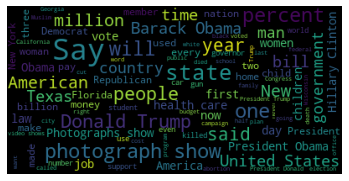

In [9]:
import unicodedata
import wordcloud
import langdetect 

document = ""

for t in X['text']:
  document += (str(t) + " ")
  
document = unicodedata.normalize('NFKD', document).encode('ascii','ignore')

# affichage des word clouds
wc = wordcloud.WordCloud(background_color='black', max_words=100, max_font_size=35)
wc = wc.generate(str(document))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()


# Pré-traitements des données textuelle avec Spacy

Spacy utilise un objet particulier, généralement appelé *nlp*, qui va créer un pipeline sur tous les éléments d'un document afin de générer un objet de type doc. Le pipeline de base est le suivant :  
<IMG SRC="http://www.lirmm.fr/~poncelet/PipelineSpacy.png" align="center" >
Il existe bien entendu différents modèles de pipeline en fonction de la langue.

In [10]:
import spacy
nlp = spacy.blank('en')

In [14]:
document = "GOP presidential candidate Ted Cruz ran a 'Netflix and Chill' contest on his campaign web site. A woman managed to call 911 during a domestic abuse incident by pretending to order a pizza. The California Department of Public Health has issued a warning against measles parties."

doc = nlp(document)
for phrases_spacy in doc:
  print ("phrases : ", phrases_spacy)

#sauvegarde des phrases dans un tableau pour les manipulations ultérieures
sentences = [sent.string.strip() for sent in doc]

phrases :  GOP
phrases :  presidential
phrases :  candidate
phrases :  Ted
phrases :  Cruz
phrases :  ran
phrases :  a
phrases :  '
phrases :  Netflix
phrases :  and
phrases :  Chill
phrases :  '
phrases :  contest
phrases :  on
phrases :  his
phrases :  campaign
phrases :  web
phrases :  site
phrases :  .
phrases :  A
phrases :  woman
phrases :  managed
phrases :  to
phrases :  call
phrases :  911
phrases :  during
phrases :  a
phrases :  domestic
phrases :  abuse
phrases :  incident
phrases :  by
phrases :  pretending
phrases :  to
phrases :  order
phrases :  a
phrases :  pizza
phrases :  .
phrases :  The
phrases :  California
phrases :  Department
phrases :  of
phrases :  Public
phrases :  Health
phrases :  has
phrases :  issued
phrases :  a
phrases :  warning
phrases :  against
phrases :  measles
phrases :  parties
phrases :  .


La liste des différents attributs est disponible ici : https://spacy.io/api/token


In [15]:
#traitement de la première phrase
first_sentence=nlp(sentences[0])

for token in first_sentence:
    # l'objet token contient différents attributs
    print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}\t{8}".format(
        token.text,
        token.idx,
        token.lemma_,
        token.is_punct,
        token.is_space,
        token.shape_,
        token.pos_,
        token.tag_,
        token.ent_type_
    ))

GOP	0	GOP	False	False	XXX			


In [16]:
from spacy import displacy
displacy.render(first_sentence, style='dep', jupyter=True, options={'distance': 85})

/usr/lib/python3.7/runpy.py:193: UserWarning: [W005] Doc object not parsed. This means displaCy won't be able to generate a dependency visualization for it. Make sure the Doc was processed with a model that supports dependency parsing, and not just a language class like `English()`. For more info, see the docs:
https://spacy.io/usage/models
  "__main__", mod_spec)


In [18]:
example_withnamedentities="Donald Trump was a President of the US and now it is Joe Biden"
sentence=nlp(example_withnamedentities)
for entity in sentence.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

# Vectorisaion

In [19]:
# Importation des différentes librairies, classes et fonctions utilespour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# librairies générales
import pandas as pd
import re
from tabulate import tabulate
import time
import numpy as np
import pickle
import string
import base64
import sys

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns

# librairies scikit learn
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# librairies des classifiers utilisés
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# librairies NLTK
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize 

 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fonctions utilities (affichage, confusion, etc.)

In [20]:
from MyNLPUtilities import *

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

texte = news['text']

print ("Application de TfidfVectorizer :")
vectorizer = TfidfVectorizer()
# fit et transform en une opération
X = vectorizer.fit_transform(texte)

# creation du dataframe pour affichage
df = pd.DataFrame(
    data=vectorizer.transform(texte).toarray(),
    columns=vectorizer.get_feature_names()
)

display(df)

Application de TfidfVectorizer :


,00,000,02,033,04,05,054th,07,084,09,...,zombies,zombism,zone,zones,zoo,zookeeper,zpass,zuckerberg,zuma,ʺmore
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8899,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8900,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8901,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8902,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
print ("Application de TfidfVectorizer avec ngram_range=(1,2) et suppression des stopwords :")
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
# fit et transform en une opération
X = vectorizer.fit_transform(texte)

# creation du dataframe pour affichage
df = pd.DataFrame(
    data=vectorizer.transform(texte).toarray(),
    columns=vectorizer.get_feature_names()
)

X = df

display(X)

Application de TfidfVectorizer avec ngram_range=(1,2) et suppression des stopwords :


,00,000,02,033,04,05,054th,07,084,09,...,zombies,zombism,zone,zones,zoo,zookeeper,zpass,zuckerberg,zuma,ʺmore
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8899,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8900,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8901,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8902,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Classification

In [ ]:
import re
import string

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

def MyCleanText(X, 
               lowercase=False, # mettre en minuscule
               removestopwords=False, # supprimer les stopwords
               removedigit=False, # supprimer les nombres  
               getstemmer=False, # conserver la racine des termes
               getlemmatisation=False # lematisation des termes 
              ):
    
    sentence=str(X)

    # suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
  
    return sentence

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres  
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False # lemmatisation des termes  
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self  

In [ ]:
# Conversion de True/False en 0/1
Y = Y['ratingName'].astype(int)

In [ ]:
Y

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = X.to_numpy()
Y = Y.to_numpy()

# Création d'un jeu d'apprentissage et de test
trainsize=0.7 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour le test

testsize= 0.3
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               Y, 
                                               train_size=trainsize, 
                                               random_state=seed,
                                               test_size=testsize)

# création du pipeline en ajoutant le classifier
pipe = Pipeline([("cleaner", TextNormalizer()),
                 ("count_vectorizer", CountVectorizer()),
                 ("SVM", SVC())])
pipe.fit(X_train,y_train)

print("pipeline créé")

In [ ]:
#from sklearn import metrics
y_pred = pipe.predict(X_test)

MyshowAllScores(y_test,y_pred)